## Final Project Submission

Please fill out:
* Student name: Jacob M hansen
* Student pace: part time
* Scheduled project review date/time: 
* Instructor name: Morgan Jones
* Blog post URL: forthcoming


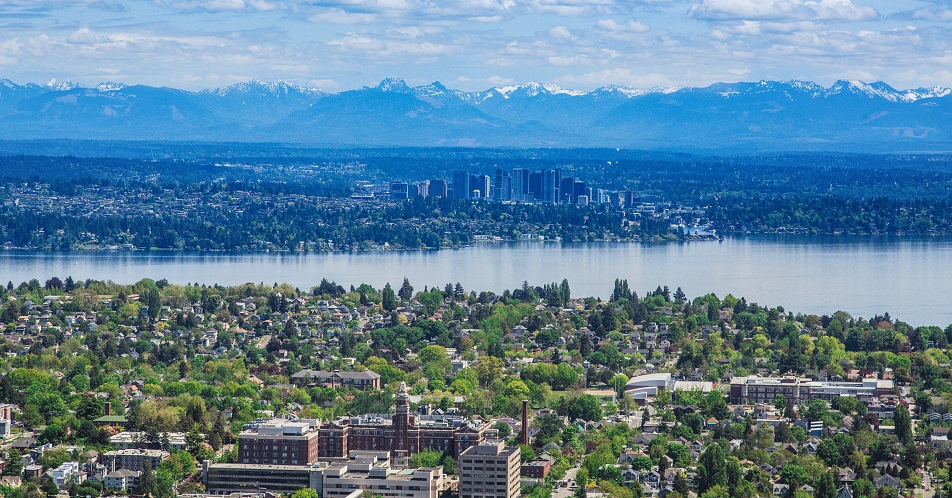

### Business Case - ARCH



ARCH is a partnership of King County and East King County cities working to preserve and increase the supply of housing for low and moderate income households in the region.  ARCH wants to expand their knowledge of the housing conditions that contribute to the sale price of a home, particularly homes priced below the median price range in King County to better serve their clients in that area.

ARCH has two primary goals:

1. Develop an algorithm that predicts the sale price of a home given certain features such as square footage, condition of the home, zip code, size of lot, number of bedrooms and bathrooms.


2. ARCH also wants to better understand how these features interact and influence the home sale price so that they can better advise their clients when searching for homes at or below the median price.




### Load and Examine Dataset

In [1]:
#import packages pandas, matplotlib, seaborn, numpy

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# load King County Housing dataset

house = pd.read_csv('kc_house_data.csv')

# Examine first rows of data set

house.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,NO,NONE,...,11 Excellent,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,NO,NONE,...,7 Average,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,NO,NaN,...,7 Average,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,NO,NONE,...,7 Average,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,NO,NONE,...,7 Average,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


In [2]:
print(house.info())
print(house.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [3]:
# Examine summary statistics
house.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [4]:
# Examine the value counts for categorical data: condition, view, waterfront and grade
house['view'].value_counts()

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [5]:
house['condition'].value_counts()

Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64

In [6]:
house['view'].value_counts()

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [7]:
house['grade'].value_counts()

7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

In [8]:
house['waterfront'].value_counts()

NO     19075
YES      146
Name: waterfront, dtype: int64

In [9]:
#check for missing data

house.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

House Sale Price Mean: 540296.5735055795
House Sale Price Median 450000.0


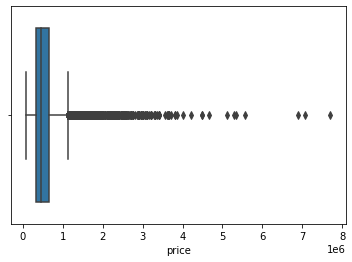

In [10]:
# Examine outliers that may skew our data

# Use boxplot to examine outliers
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

sns.boxplot(house['price'])

print("House Sale Price Mean:", house['price'].mean())
print("House Sale Price Median", house['price'].median())

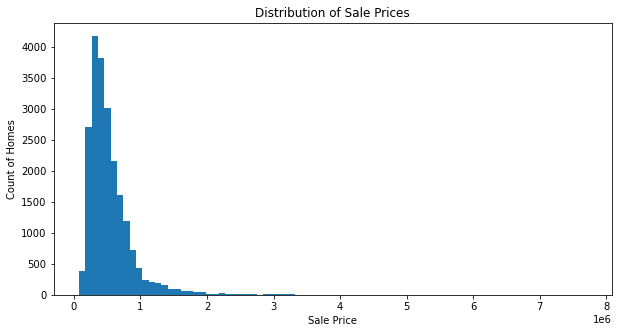

In [11]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.hist(house['price'], bins=80)

ax.set_xlabel("Sale Price")
ax.set_ylabel("Count of Homes")
ax.set_title("Distribution of Sale Prices");


In [12]:
# Capture the data that reflects two standard deviations, z-score = 2, to capture 95% of data 
# and to eliminate extreme outliers that skew the mean. 

print(house['price'].describe())

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64


In [13]:
# Identify z-score range of 2 to capture 95% of data and reduce extreme outliers
upper = house.price.mean() + 2*house.price.std()

lower = house.price.mean() - 2*house.price.std()

print(upper)

print(lower)

1275032.8537083685
-194439.7066972095


In [14]:
new_house= house[(house.price<upper) & (house.price>lower)]

#new_house = house[house.price < 1000000]

print(house.shape)

print(new_house.shape)

(21597, 21)
(20756, 21)


## Predictive Modeling

#### Assign relevant columns

In [15]:
# Assign target and predictors

# Target
y = new_house["price"]
# Predictors
X = new_house.drop('price', axis = 1)

In [16]:
# import scikit learn and split the data into training and test data

from sklearn.linear_model import LinearRegression

model = LinearRegression()
#model.fit(X_train, y_train)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state=42)

In [17]:

print(f"X_train is a DataFrame with {X_train.shape[0]} rows and {X_train.shape[1]} columns")
print(f"y_train is a Series with {y_train.shape[0]} values")

# Assert that we have the same number of rows in X as values in y
assert X_train.shape[0] == y_train.shape[0]

X_train is a DataFrame with 15567 rows and 20 columns
y_train is a Series with 15567 values


In [18]:
house.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [19]:
# Assign relevant columns

relevant_columns = [
    'date',  # date house was sold
    'bedrooms',  # the number of bedrooms
    'bathrooms', # number of bathrooms  
    'sqft_living', # square footage of home living space  
    'sqft_lot',  # square footage of the lot
    'condition', # how good the overall condition of the house is, related to maintenance 
    'grade',  # the overall design and construction of the house 
    'yr_built', # year the home was constructed
    'zipcode',  # zipcode location of the home
    'yr_renovated', # year house was renovated
    'lat', # latitude of home
    'long', # longitude of home
    'view', # details type of view the home has
    'floors' # number of floors in the home

]

# Reassign X_train so that it only contains relevant columns
X_train = X_train.loc[ : , relevant_columns]

# Visually inspect X_train
X_train.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,condition,grade,yr_built,zipcode,yr_renovated,lat,long,view,floors
13029,9/8/2014,3,1.75,2580,40392,Average,9 Better,1986,98072,NaN,47.7637,-122.134,NONE,1.0
10675,11/13/2014,3,1.75,2060,3600,Average,7 Average,1905,98119,1985.0,47.6389,-122.371,NONE,1.5
20973,8/5/2014,5,3.25,3030,7410,Average,8 Good,2014,98106,0.0,47.5530,-122.354,NONE,2.0
18777,8/27/2014,3,2.25,2550,8588,Average,9 Better,1989,98011,0.0,47.7711,-122.195,EXCELLENT,1.0
863,3/3/2015,3,3.50,2480,3200,Average,10 Very Good,2010,98144,0.0,47.5951,-122.307,NONE,2.0


In [20]:
# Assign Relevant columns to X_test
X_test = X_test.loc[ : , relevant_columns]

X_test.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,condition,grade,yr_built,zipcode,yr_renovated,lat,long,view,floors
10693,4/30/2015,3,2.50,1640,5707,Average,7 Average,1995,98031,NaN,47.4016,-122.209,NONE,2.0
4233,6/12/2014,3,1.00,1050,5664,Good,7 Average,1947,98115,0.0,47.6897,-122.285,NONE,1.0
9396,10/7/2014,3,1.75,1560,5760,Very Good,6 Low Average,1927,98106,0.0,47.5272,-122.359,NONE,1.0
11700,8/21/2014,2,1.75,1960,6000,Good,7 Average,1904,98199,0.0,47.6531,-122.401,NONE,1.0
8568,5/27/2014,2,1.00,1040,5527,Average,7 Average,1951,98115,0.0,47.6774,-122.284,NONE,1.0


Home Sale Price Median: 440000.0
Home Sale Price Mean: 485821.4763923685


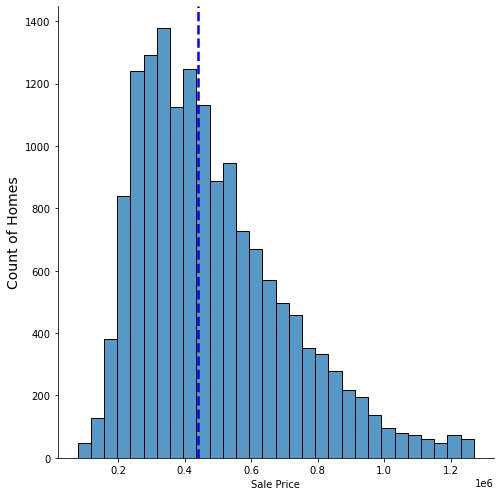

In [21]:
# Examine sale price distribution

sns.displot(house,
            x = y_train,
            bins=30,
           height=7)
plt.xlabel("Sale Price", size=10)
plt.ylabel("Count of Homes", size=14)
plt.axvline(x=y_train.median(),
            color='blue',
            ls='--', 
            lw=2.5);

plt.savefig("SalePrice_histogram_with_median_line")

print("Home Sale Price Median:", y_train.median())
print("Home Sale Price Mean:", y_train.mean())

#### Handle Missing Values

In [22]:
# Identify missing values

X_train.isna().sum()

date               0
bedrooms           0
bathrooms          0
sqft_living        0
sqft_lot           0
condition          0
grade              0
yr_built           0
zipcode            0
yr_renovated    2748
lat                0
long               0
view              47
floors             0
dtype: int64

#### Convert categorical features to numerical data

In [23]:
# Identify categorical and numeric data
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15567 entries, 13029 to 16406
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          15567 non-null  object 
 1   bedrooms      15567 non-null  int64  
 2   bathrooms     15567 non-null  float64
 3   sqft_living   15567 non-null  int64  
 4   sqft_lot      15567 non-null  int64  
 5   condition     15567 non-null  object 
 6   grade         15567 non-null  object 
 7   yr_built      15567 non-null  int64  
 8   zipcode       15567 non-null  int64  
 9   yr_renovated  12819 non-null  float64
 10  lat           15567 non-null  float64
 11  long          15567 non-null  float64
 12  view          15520 non-null  object 
 13  floors        15567 non-null  float64
dtypes: float64(5), int64(5), object(4)
memory usage: 1.8+ MB


In [24]:
# Examine value counts for categories - 'object' datatypes

print(X_train['date'].value_counts())
print()
print(X_train['condition'].value_counts())
print()
print(X_train['grade'].value_counts())
print()
print(X_train['view'].value_counts())

6/26/2014     101
6/23/2014      97
3/25/2015      95
4/29/2015      90
4/14/2015      90
             ... 
8/30/2014       1
8/9/2014        1
11/15/2014      1
3/22/2015       1
10/12/2014      1
Name: date, Length: 365, dtype: int64

Average      10122
Good          4100
Very Good     1195
Fair           128
Poor            22
Name: condition, dtype: int64

7 Average        6789
8 Good           4441
9 Better         1821
6 Low Average    1558
10 Very Good      621
5 Fair            173
11 Excellent      143
4 Low              14
12 Luxury           6
3 Poor              1
Name: grade, dtype: int64

NONE         14265
AVERAGE        630
GOOD           286
FAIR           202
EXCELLENT      137
Name: view, dtype: int64


In [25]:
# convert date to numeric and extract month only 
import datetime

#X_train['date'] = pd.to_datetime(X_train["date"]).dt.strftime("%Y%m%d").astype(int)

X_train['sale_month'] = pd.DatetimeIndex(X_train['date']).month.astype(int)

X_train['sale_month'].value_counts()

5     1754
4     1604
7     1579
6     1571
10    1371
8     1352
3     1350
9     1287
12    1060
11    1024
2      906
1      709
Name: sale_month, dtype: int64

In [26]:
X_train.drop('date', axis = 1, inplace = True)

In [27]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15567 entries, 13029 to 16406
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   bedrooms      15567 non-null  int64  
 1   bathrooms     15567 non-null  float64
 2   sqft_living   15567 non-null  int64  
 3   sqft_lot      15567 non-null  int64  
 4   condition     15567 non-null  object 
 5   grade         15567 non-null  object 
 6   yr_built      15567 non-null  int64  
 7   zipcode       15567 non-null  int64  
 8   yr_renovated  12819 non-null  float64
 9   lat           15567 non-null  float64
 10  long          15567 non-null  float64
 11  view          15520 non-null  object 
 12  floors        15567 non-null  float64
 13  sale_month    15567 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.8+ MB


In [28]:
# convert date in X_test to sale_month
X_test['sale_month'] = pd.DatetimeIndex(X_test['date']).month.astype(int)

X_test.drop('date', axis = 1, inplace = True)

In [29]:
X_test['sale_month'].value_counts()

5     559
7     545
4     537
6     521
8     515
3     442
9     435
10    428
12    356
11    332
2     295
1     224
Name: sale_month, dtype: int64

### Baseline model
Identify the most correlated feature and build a baseline model for price.

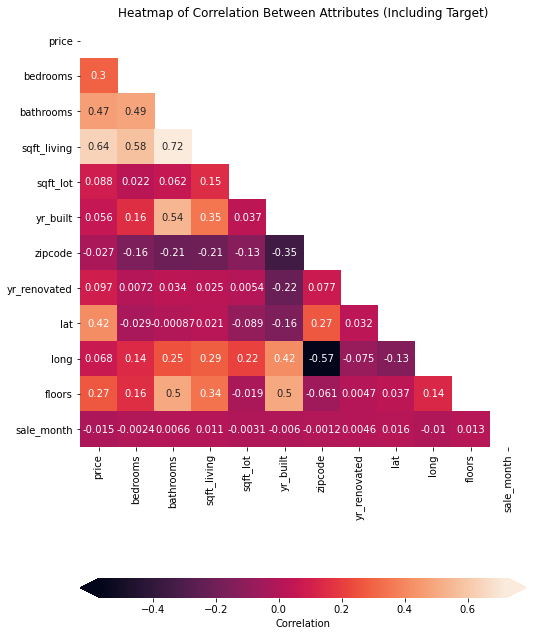

In [30]:
# Create a heatmap to examine the correlational coefficents

# Create a df with the target as the first column,
# then compute the correlation matrix
heatmap_data = pd.concat([y_train, X_train], axis=1)
corr = heatmap_data.corr()

# Set up figure and axes
fig, ax = plt.subplots(figsize=(8, 12))

# Plot a heatmap of the correlation matrix, with both
# numbers and colors indicating the correlations
sns.heatmap(
    # Specifies the data to be plotted
    data=corr,
    # The mask means we only show half the values,
    # instead of showing duplicates. It's optional.
    mask=np.triu(np.ones_like(corr, dtype=bool)),
    # Specifies that we should use the existing axes
    ax=ax,
    # Specifies that we want labels, not just colors
    annot=True,
    # Customizes colorbar appearance
    cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both"}
)

# Customize the plot appearance
ax.set_title("Heatmap of Correlation Between Attributes (Including Target)");

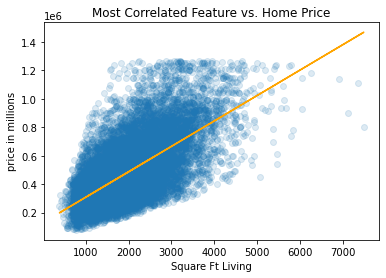

In [31]:
most_correlated_feature = 'sqft_living'

fig, ax = plt.subplots()

ax.scatter(X_train[most_correlated_feature], y_train, alpha=0.15)
m, b = np.polyfit(X_train[most_correlated_feature], y_train, 1)
plt.plot(X_train[most_correlated_feature], m*X_train[most_correlated_feature]+b, color = 'orange')
ax.set_xlabel("Square Ft Living")
ax.set_ylabel("price in millions")
ax.set_title("Most Correlated Feature vs. Home Price");

In [32]:
from sklearn.linear_model import LinearRegression

baseline_model = LinearRegression()

from sklearn.model_selection import cross_validate, ShuffleSplit

splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=0)

baseline_scores = cross_validate(
    estimator=baseline_model,
    X=X_train[[most_correlated_feature]],
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Train score:      0.40324782709139456
Validation score: 0.409301098969402


### Baseline model summary - 
The baseline model takes the most correlated feature, square foot living space, to examine how it affects home price. The score is an R squared value. Currently, using only one feature, the baseline model accounts for approximately 40% of the variance in a home price. Square foot living is a significant feature, but on its own it is not enough to explain the price of a home.

### First Predictive Model

Create a model that includes all selected relevant features.

Include all features now from X_train. Convert categories to numeric using scikitlearn preprocessing. Account for multicollinearity using OneHotEncoder

In [33]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15567 entries, 13029 to 16406
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   bedrooms      15567 non-null  int64  
 1   bathrooms     15567 non-null  float64
 2   sqft_living   15567 non-null  int64  
 3   sqft_lot      15567 non-null  int64  
 4   condition     15567 non-null  object 
 5   grade         15567 non-null  object 
 6   yr_built      15567 non-null  int64  
 7   zipcode       15567 non-null  int64  
 8   yr_renovated  12819 non-null  float64
 9   lat           15567 non-null  float64
 10  long          15567 non-null  float64
 11  view          15520 non-null  object 
 12  floors        15567 non-null  float64
 13  sale_month    15567 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.8+ MB


#### Handle Missing Data

1. X_train missing data for yr_renovated and view

2. X_test missing data for yr_renovated and view

In [34]:
X_train.isna().sum()


bedrooms           0
bathrooms          0
sqft_living        0
sqft_lot           0
condition          0
grade              0
yr_built           0
zipcode            0
yr_renovated    2748
lat                0
long               0
view              47
floors             0
sale_month         0
dtype: int64

In [35]:
# Convert yr_renovated to binary, if there is a value == 1
#Create a new column name 'renovated' that captures whether the house was renovated or not

X_train['renovated'] = X_train['yr_renovated'].where(X_train['yr_renovated'] == 0)
X_train['renovated'].fillna('1', inplace = True)
X_train['renovated']= X_train['renovated'].astype(int)

#Drop yr_renovated column
X_train.drop(['yr_renovated'], axis = 1, inplace = True)

#Inspect yr_renovated column is dropped and for new column renovated
X_train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,condition,grade,yr_built,zipcode,lat,long,view,floors,sale_month,renovated
13029,3,1.75,2580,40392,Average,9 Better,1986,98072,47.7637,-122.134,NONE,1.0,9,1
10675,3,1.75,2060,3600,Average,7 Average,1905,98119,47.6389,-122.371,NONE,1.5,11,1
20973,5,3.25,3030,7410,Average,8 Good,2014,98106,47.5530,-122.354,NONE,2.0,8,0
18777,3,2.25,2550,8588,Average,9 Better,1989,98011,47.7711,-122.195,EXCELLENT,1.0,8,0
863,3,3.50,2480,3200,Average,10 Very Good,2010,98144,47.5951,-122.307,NONE,2.0,3,0


In [36]:
# Handle missing values in view column

X_train['view'] = X_train['view'].fillna('missing')

# Inspect X_train for missing values

X_train.isna().sum()

bedrooms       0
bathrooms      0
sqft_living    0
sqft_lot       0
condition      0
grade          0
yr_built       0
zipcode        0
lat            0
long           0
view           0
floors         0
sale_month     0
renovated      0
dtype: int64

In [37]:
# Convert yr_renovated in X_test to binary, if there is a value == 1
#Create a new column name 'renovated' that captures whether the house was renovated or not

X_test['renovated'] = X_test['yr_renovated'].where(X_test['yr_renovated'] == 0)
X_test['renovated'].fillna('1', inplace = True)
X_test['renovated']= X_test['renovated'].astype(int)

#Drop yr_renovated column
X_test.drop(['yr_renovated'], axis = 1, inplace = True)

#Inspect yr_renovated column is dropped and for new column renovated
X_test.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,condition,grade,yr_built,zipcode,lat,long,view,floors,sale_month,renovated
10693,3,2.50,1640,5707,Average,7 Average,1995,98031,47.4016,-122.209,NONE,2.0,4,1
4233,3,1.00,1050,5664,Good,7 Average,1947,98115,47.6897,-122.285,NONE,1.0,6,0
9396,3,1.75,1560,5760,Very Good,6 Low Average,1927,98106,47.5272,-122.359,NONE,1.0,10,0
11700,2,1.75,1960,6000,Good,7 Average,1904,98199,47.6531,-122.401,NONE,1.0,8,0
8568,2,1.00,1040,5527,Average,7 Average,1951,98115,47.6774,-122.284,NONE,1.0,5,0


In [38]:
# Handle missing values in X_test view column

X_test['view'] = X_test['view'].fillna('missing')

# Inspect X_train for missing values

X_test.isna().sum()

bedrooms       0
bathrooms      0
sqft_living    0
sqft_lot       0
condition      0
grade          0
yr_built       0
zipcode        0
lat            0
long           0
view           0
floors         0
sale_month     0
renovated      0
dtype: int64

### Account for Multicollinearity in the categorical features 

Categorical Features - condition, grade, view, and renovated.

Renovated is binary but should be categorical in this instance

Begin with X_train and then X_test following each X_train category to ensure categories line up.

#### One Hot Encode for condition

In [39]:
# (0) import OneHotEncoder from sklearn.preprocessing
from sklearn.preprocessing import OneHotEncoder

# (1) Create a variable condition_train
# extracted from X_train
# (double brackets due to shape expected by OHE)
condition_train = X_train[["condition"]]

# (2) Instantiate a OneHotEncoder with categories="auto",
# sparse=False, and handle_unknown="ignore"
ohe = OneHotEncoder(categories = "auto", sparse = False, handle_unknown = "ignore")

# (3) Fit the encoder on condition_train
ohe.fit(condition_train)

# Inspect the categories of the fitted encoder
ohe.categories_

[array(['Average', 'Fair', 'Good', 'Poor', 'Very Good'], dtype=object)]

In [40]:
# (4) Transform condition_train using the encoder and
# assign the result to condition_encoded_train
condition_encoded_train = ohe.transform(condition_train)

# Visually inspect condition_encoded_train
condition_encoded_train

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [41]:
# (5a) Make the transformed data into a dataframe
condition_encoded_train = pd.DataFrame(
    # Pass in NumPy array
    condition_encoded_train,
    # Set the column names to the categories found by OHE
    columns=ohe.categories_[0],
    # Set the index to match X_train's index
    index=X_train.index
)

# Visually inspect new dataframe
condition_encoded_train.head()

,Average,Fair,Good,Poor,Very Good
13029,1.0,0.0,0.0,0.0,0.0
10675,1.0,0.0,0.0,0.0,0.0
20973,1.0,0.0,0.0,0.0,0.0
18777,1.0,0.0,0.0,0.0,0.0
863,1.0,0.0,0.0,0.0,0.0


In [42]:
# (5b) Drop original condition column
X_train.drop("condition", axis=1, inplace=True)

# Visually inspect X_train
X_train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,grade,yr_built,zipcode,lat,long,view,floors,sale_month,renovated
13029,3,1.75,2580,40392,9 Better,1986,98072,47.7637,-122.134,NONE,1.0,9,1
10675,3,1.75,2060,3600,7 Average,1905,98119,47.6389,-122.371,NONE,1.5,11,1
20973,5,3.25,3030,7410,8 Good,2014,98106,47.5530,-122.354,NONE,2.0,8,0
18777,3,2.25,2550,8588,9 Better,1989,98011,47.7711,-122.195,EXCELLENT,1.0,8,0
863,3,3.50,2480,3200,10 Very Good,2010,98144,47.5951,-122.307,NONE,2.0,3,0


In [43]:
# (5c) Concatenate the new dataframe with current X_train
X_train = pd.concat([X_train, condition_encoded_train], axis=1)

# Visually inspect X_train
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15567 entries, 13029 to 16406
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   bedrooms     15567 non-null  int64  
 1   bathrooms    15567 non-null  float64
 2   sqft_living  15567 non-null  int64  
 3   sqft_lot     15567 non-null  int64  
 4   grade        15567 non-null  object 
 5   yr_built     15567 non-null  int64  
 6   zipcode      15567 non-null  int64  
 7   lat          15567 non-null  float64
 8   long         15567 non-null  float64
 9   view         15567 non-null  object 
 10  floors       15567 non-null  float64
 11  sale_month   15567 non-null  int64  
 12  renovated    15567 non-null  int64  
 13  Average      15567 non-null  float64
 14  Fair         15567 non-null  float64
 15  Good         15567 non-null  float64
 16  Poor         15567 non-null  float64
 17  Very Good    15567 non-null  float64
dtypes: float64(9), int64(7), object(2)
memory 

In [44]:
#One-hot encode X_test condition

condition_test = X_test[["condition"]]
condition_encoded_test = ohe.transform(condition_test)
condition_encoded_test = pd.DataFrame(
    condition_encoded_test,
    columns=ohe.categories_[0],
    index=X_test.index
)
X_test.drop("condition", axis=1, inplace=True)
X_test = pd.concat([X_test, condition_encoded_test], axis=1)


#### One Hot Encode for Grade

In [45]:
# One hot encode grade

grade_train = X_train[["grade"]]

ohe.fit(grade_train)

# Inspect the categories of the fitted encoder
ohe.categories_

[array(['10 Very Good', '11 Excellent', '12 Luxury', '3 Poor', '4 Low',
        '5 Fair', '6 Low Average', '7 Average', '8 Good', '9 Better'],
       dtype=object)]

In [46]:
# Transform condition_train using the encoder 
grade_encoded_train = ohe.transform(grade_train)

# Visually inspect condition_encoded_train
grade_encoded_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [47]:
# Make the transformed data into a dataframe
grade_encoded_train = pd.DataFrame(
    # Pass in NumPy array
    grade_encoded_train,
    # Set the column names to the categories found by OHE
    columns=ohe.categories_[0],
    # Set the index to match X_train's index
    index=X_train.index
)

# Visually inspect new dataframe
grade_encoded_train.head()

,10 Very Good,11 Excellent,12 Luxury,3 Poor,4 Low,5 Fair,6 Low Average,7 Average,8 Good,9 Better
13029,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10675,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
20973,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
18777,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
863,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
# (5b) Drop original condition column
X_train.drop("grade", axis=1, inplace=True)

# Visually inspect X_train
X_train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,yr_built,zipcode,lat,long,view,floors,sale_month,renovated,Average,Fair,Good,Poor,Very Good
13029,3,1.75,2580,40392,1986,98072,47.7637,-122.134,NONE,1.0,9,1,1.0,0.0,0.0,0.0,0.0
10675,3,1.75,2060,3600,1905,98119,47.6389,-122.371,NONE,1.5,11,1,1.0,0.0,0.0,0.0,0.0
20973,5,3.25,3030,7410,2014,98106,47.5530,-122.354,NONE,2.0,8,0,1.0,0.0,0.0,0.0,0.0
18777,3,2.25,2550,8588,1989,98011,47.7711,-122.195,EXCELLENT,1.0,8,0,1.0,0.0,0.0,0.0,0.0
863,3,3.50,2480,3200,2010,98144,47.5951,-122.307,NONE,2.0,3,0,1.0,0.0,0.0,0.0,0.0


In [49]:
# (5c) Concatenate the new dataframe with current X_train
X_train = pd.concat([X_train, grade_encoded_train], axis=1)

# Visually inspect X_train
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15567 entries, 13029 to 16406
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       15567 non-null  int64  
 1   bathrooms      15567 non-null  float64
 2   sqft_living    15567 non-null  int64  
 3   sqft_lot       15567 non-null  int64  
 4   yr_built       15567 non-null  int64  
 5   zipcode        15567 non-null  int64  
 6   lat            15567 non-null  float64
 7   long           15567 non-null  float64
 8   view           15567 non-null  object 
 9   floors         15567 non-null  float64
 10  sale_month     15567 non-null  int64  
 11  renovated      15567 non-null  int64  
 12  Average        15567 non-null  float64
 13  Fair           15567 non-null  float64
 14  Good           15567 non-null  float64
 15  Poor           15567 non-null  float64
 16  Very Good      15567 non-null  float64
 17  10 Very Good   15567 non-null  float64
 18  11

In [50]:
#One-hot encode X_test grade

grade_test = X_test[["grade"]]
grade_encoded_test = ohe.transform(grade_test)
grade_encoded_test = pd.DataFrame(
    grade_encoded_test,
    columns=ohe.categories_[0],
    index=X_test.index
)
X_test.drop("grade", axis=1, inplace=True)
X_test = pd.concat([X_test, grade_encoded_test], axis=1)


#### One Hot Encode for View

In [51]:
# One hot encode view

view_train = X_train[["view"]]

ohe.fit(view_train)

# Inspect the categories of the fitted encoder
ohe.categories_

[array(['AVERAGE', 'EXCELLENT', 'FAIR', 'GOOD', 'NONE', 'missing'],
       dtype=object)]

In [52]:
# Transform condition_train using the encoder 
view_encoded_train = ohe.transform(view_train)

# Make the transformed data into a dataframe
view_encoded_train = pd.DataFrame(
    # Pass in NumPy array
    view_encoded_train,
    # Set the column names to the categories found by OHE
    columns=ohe.categories_[0],
    # Set the index to match X_train's index
    index=X_train.index
)

# Visually inspect new dataframe
view_encoded_train.head()

,AVERAGE,EXCELLENT,FAIR,GOOD,NONE,missing
13029,0.0,0.0,0.0,0.0,1.0,0.0
10675,0.0,0.0,0.0,0.0,1.0,0.0
20973,0.0,0.0,0.0,0.0,1.0,0.0
18777,0.0,1.0,0.0,0.0,0.0,0.0
863,0.0,0.0,0.0,0.0,1.0,0.0


In [53]:
# (5b) Drop original condition column
X_train.drop("view", axis=1, inplace=True)

# Visually inspect X_train
X_train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,yr_built,zipcode,lat,long,floors,sale_month,...,10 Very Good,11 Excellent,12 Luxury,3 Poor,4 Low,5 Fair,6 Low Average,7 Average,8 Good,9 Better
13029,3,1.75,2580,40392,1986,98072,47.7637,-122.134,1.0,9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10675,3,1.75,2060,3600,1905,98119,47.6389,-122.371,1.5,11,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
20973,5,3.25,3030,7410,2014,98106,47.5530,-122.354,2.0,8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
18777,3,2.25,2550,8588,1989,98011,47.7711,-122.195,1.0,8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
863,3,3.50,2480,3200,2010,98144,47.5951,-122.307,2.0,3,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
# (5c) Concatenate the new dataframe with current X_train
X_train = pd.concat([X_train, view_encoded_train], axis=1)

# Visually inspect X_train
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15567 entries, 13029 to 16406
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       15567 non-null  int64  
 1   bathrooms      15567 non-null  float64
 2   sqft_living    15567 non-null  int64  
 3   sqft_lot       15567 non-null  int64  
 4   yr_built       15567 non-null  int64  
 5   zipcode        15567 non-null  int64  
 6   lat            15567 non-null  float64
 7   long           15567 non-null  float64
 8   floors         15567 non-null  float64
 9   sale_month     15567 non-null  int64  
 10  renovated      15567 non-null  int64  
 11  Average        15567 non-null  float64
 12  Fair           15567 non-null  float64
 13  Good           15567 non-null  float64
 14  Poor           15567 non-null  float64
 15  Very Good      15567 non-null  float64
 16  10 Very Good   15567 non-null  float64
 17  11 Excellent   15567 non-null  float64
 18  12

In [55]:
#One-hot encode X_test view

view_test = X_test[["view"]]
view_encoded_test = ohe.transform(view_test)
view_encoded_test = pd.DataFrame(
    view_encoded_test,
    columns=ohe.categories_[0],
    index=X_test.index
)
X_test.drop("view", axis=1, inplace=True)
X_test = pd.concat([X_test, view_encoded_test], axis=1)


#### One hot encode for renovated

In [56]:
# One hot encode renovated

renovated_train = X_train[["renovated"]]

ohe.fit(renovated_train)

# Inspect the categories of the fitted encoder
ohe.categories_

[array([0, 1])]

In [57]:
# Transform renovated_train using the encoder 
renovated_encoded_train = ohe.transform(renovated_train)

# Make the transformed data into a dataframe
renovated_encoded_train = pd.DataFrame(
    # Pass in NumPy array
    renovated_encoded_train,
    # Set the column names to the categories found by OHE
    columns=ohe.categories_[0],
    # Set the index to match X_train's index
    index=X_train.index
)


In [58]:
# Drop original renovated column
X_train.drop("renovated", axis=1, inplace=True)

# Visually inspect X_train
X_train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,yr_built,zipcode,lat,long,floors,sale_month,...,6 Low Average,7 Average,8 Good,9 Better,AVERAGE,EXCELLENT,FAIR,GOOD,NONE,missing
13029,3,1.75,2580,40392,1986,98072,47.7637,-122.134,1.0,9,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
10675,3,1.75,2060,3600,1905,98119,47.6389,-122.371,1.5,11,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
20973,5,3.25,3030,7410,2014,98106,47.5530,-122.354,2.0,8,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
18777,3,2.25,2550,8588,1989,98011,47.7711,-122.195,1.0,8,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
863,3,3.50,2480,3200,2010,98144,47.5951,-122.307,2.0,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [59]:
# Concatenate X_train and renovated encoded
X_train = pd.concat([X_train, renovated_encoded_train], axis=1)

In [60]:
#One-hot encode X_test renovated

renovated_test = X_test[["renovated"]]
renovated_encoded_test = ohe.transform(renovated_test)
renovated_encoded_test = pd.DataFrame(
    renovated_encoded_test,
    columns=ohe.categories_[0],
    index=X_test.index
)
X_test.drop("renovated", axis=1, inplace=True)
X_test = pd.concat([X_test, renovated_encoded_test], axis=1)


### Evaluate First Predictive Model

In [61]:
# Perform cross validation to check how the model is performing
from sklearn.model_selection import cross_val_score


from sklearn.linear_model import LinearRegression

model_1 = LinearRegression()

from sklearn.model_selection import cross_validate, ShuffleSplit

splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=42)

model_1_scores = cross_validate(
    estimator=model_1,
    X=X_train,
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Train score:     ", model_1_scores["train_score"].mean())
print("Validation score:", model_1_scores["test_score"].mean())

Train score:      0.7028422850446635
Validation score: 0.7035709013153183


In [62]:
cross_val_score(model_1, X_train, y_train, cv=3)

array([0.69572344, 0.70310739, 0.70448627])

In [63]:
import statsmodels.api as sm

sm.OLS(y_train, sm.add_constant(X_train)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     1271.
Date:                Wed, 21 Sep 2022   Prob (F-statistic):               0.00
Time:                        14:46:32   Log-Likelihood:            -2.0436e+05
No. Observations:               15567   AIC:                         4.088e+05
Df Residuals:                   15537   BIC:                         4.090e+05
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.805e+06   1.04e+06      1.735      0.083   -2.34e+05    3.84e+06
bedrooms      -8821.8753   1374.913     -6.416      0.000   -1.15e+04   -6126.886
bathrooms      2.808e+04   2362.297     11.885      0.000    2.34e+04    3.27e+04
sqft_living      89.2632      2.410     37.044      0.000      84.540      93.986
sqft_lot          0.1366      0.025      5.552      0.000       0.088       0.185
yr_built      -1983.4714     51.462    -38.542      0.000   -2084.343   -1882.599
zipcode        -321.4291     23.711    -13.556      0.000    -367.905    -274.953
lat            5.579e+05   7508.598     74.299      0.000    5.43e+05    5.73e+05
long          -4.669e+04   9156.393     -5.099      0.000   -6.46e+04   -2.87e+04
floors          2.98e+04   2343.542     12.717      0.000    2.52e+04    3.44e+04
sale_month    -2283.4757    312.921     -7.297      0.000   -2896.837   -1670.114
Average        3.703e+05   2.08e+05      1.777      0.076   -3.81e+04    7.79e+05
Fair           3.449e+05   2.08e+05      1.654      0.098   -6.37e+04    7.53e+05
Good           3.898e+05   2.08e+05      1.875      0.061   -1.77e+04    7.97e+05
Poor           2.786e+05   2.09e+05      1.332      0.183   -1.31e+05    6.88e+05
Very Good      4.215e+05   2.08e+05      2.026      0.043    1.37e+04    8.29e+05
10 Very Good   3.708e+05   1.05e+05      3.523      0.000    1.64e+05    5.77e+05
11 Excellent   4.321e+05   1.06e+05      4.093      0.000    2.25e+05    6.39e+05
12 Luxury       3.72e+05   1.14e+05      3.258      0.001    1.48e+05    5.96e+05
3 Poor         1.137e+05   1.51e+05      0.755      0.450   -1.81e+05    4.09e+05
4 Low           978.3634   1.09e+05      0.009      0.993   -2.12e+05    2.14e+05
5 Fair        -1.492e+04   1.05e+05     -0.142      0.887   -2.21e+05    1.91e+05
6 Low Average  8326.4109   1.05e+05      0.079      0.937   -1.98e+05    2.15e+05
7 Average      7.888e+04   1.05e+05      0.750      0.453   -1.27e+05    2.85e+05
8 Good         1.635e+05   1.05e+05      1.554      0.120   -4.27e+04     3.7e+05
9 Better       2.797e+05   1.05e+05      2.659      0.008    7.35e+04    4.86e+05
AVERAGE        2.892e+05   1.73e+05      1.667      0.095   -5.08e+04    6.29e+05
EXCELLENT       4.25e+05   1.74e+05      2.444      0.015    8.41e+04    7.66e+05
FAIR           2.967e+05   1.74e+05      1.707      0.088   -4.39e+04    6.37e+05
GOOD           3.321e+05   1.74e+05      1.913      0.056   -8252.373    6.72e+05
NONE           2.188e+05   1.73e+05      1.264      0.206    -1.2e+05    5.58e+05
missing        2.431e+05   1.74e+05      1.399      0.162   -9.76e+04    5.84e+05
0              9.006e+05    5.2e+05      1.731      0.083   -1.19e+05    1.92e+06
1              9.044e+05    5.2e+05      1.739      0.082   -1.15e+05    1.92e+06
=================================================

### First predictive model iteration summary - 

After converting all columns to numeric data and accounting for multicollinearity using OneHotEncoder, the current model accounts for close to 70% of the variance between home sale price and the independent varaiables.  This is an improvement on the baseline model that only used the most correlated feature of square foot living space giving us a variance value of ~40%. While this increase is helpful the variance could possibly be improved. It may be helpful to one hot encode the numeric features of bedrooms, bathrooms, and floors. These features may also be closely associated to sqft_living space so it would also help address multicollinearity. It may be helpful to also standard scale the features and iterate once more. 

## Second predictive model 

One hot encode bedrooms, bathrooms, zipcode, floors and sale_month

Standard scale the features and check for model improvement. 

Evaluate the model and check for linearity, normality, and heteroskedasticity

#### OHE for bedrooms

In [64]:
# One hot encode bedrooms

bedrooms_train = X_train[["bedrooms"]]

ohe.fit(bedrooms_train)

ohe.categories_


[array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 33])]

In [65]:
# Transform renovated_train using the encoder 
bedrooms_encoded_train = ohe.transform(bedrooms_train)

bedrooms_encoded_train

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [66]:
# Make the transformed data into a dataframe
bedrooms_encoded_train = pd.DataFrame(
    # Pass in NumPy array
    bedrooms_encoded_train,
    # Set the column names to the categories found by OHE
    columns=ohe.categories_[0],
    # Set the index to match X_train's index
    index=X_train.index
)

bedrooms_encoded_train.head()

,1,2,3,4,5,6,7,8,9,10,11,33
13029,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10675,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20973,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18777,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
863,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [67]:
# Drop original renovated column
X_train.drop("bedrooms", axis=1, inplace=True)

X_train

,bathrooms,sqft_living,sqft_lot,yr_built,zipcode,lat,long,floors,sale_month,Average,...,8 Good,9 Better,AVERAGE,EXCELLENT,FAIR,GOOD,NONE,missing,0,1
13029,1.75,2580,40392,1986,98072,47.7637,-122.134,1.0,9,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
10675,1.75,2060,3600,1905,98119,47.6389,-122.371,1.5,11,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
20973,3.25,3030,7410,2014,98106,47.5530,-122.354,2.0,8,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
18777,2.25,2550,8588,1989,98011,47.7711,-122.195,1.0,8,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
863,3.50,2480,3200,2010,98144,47.5951,-122.307,2.0,3,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11698,1.50,1200,8404,1964,98188,47.4482,-122.269,1.0,12,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
12414,3.25,3740,136915,1990,98166,47.4549,-122.363,2.5,6,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
5585,1.75,1630,9000,1955,98004,47.6023,-122.205,1.0,3,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
894,2.50,1710,7700,1962,98007,47.5922,-122.146,1.5,11,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [68]:
# Concatenate the new dataframe with current X_train
X_train = pd.concat([X_train, bedrooms_encoded_train], axis=1)

# Visually inspect X_train
X_train

,bathrooms,sqft_living,sqft_lot,yr_built,zipcode,lat,long,floors,sale_month,Average,...,3,4,5,6,7,8,9,10,11,33
13029,1.75,2580,40392,1986,98072,47.7637,-122.134,1.0,9,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10675,1.75,2060,3600,1905,98119,47.6389,-122.371,1.5,11,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20973,3.25,3030,7410,2014,98106,47.5530,-122.354,2.0,8,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18777,2.25,2550,8588,1989,98011,47.7711,-122.195,1.0,8,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
863,3.50,2480,3200,2010,98144,47.5951,-122.307,2.0,3,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11698,1.50,1200,8404,1964,98188,47.4482,-122.269,1.0,12,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12414,3.25,3740,136915,1990,98166,47.4549,-122.363,2.5,6,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5585,1.75,1630,9000,1955,98004,47.6023,-122.205,1.0,3,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
894,2.50,1710,7700,1962,98007,47.5922,-122.146,1.5,11,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [69]:
#One-hot encode X_test bedrooms

bedrooms_test = X_test[["bedrooms"]]
bedrooms_encoded_test = ohe.transform(bedrooms_test)
bedrooms_encoded_test = pd.DataFrame(
    bedrooms_encoded_test,
    columns=ohe.categories_[0],
    index=X_test.index
)
X_test.drop("bedrooms", axis=1, inplace=True)
X_test = pd.concat([X_test, bedrooms_encoded_test], axis=1)


#### OHE for bathrooms

In [70]:
# One hot encode bathrooms

bathrooms_train = X_train[["bathrooms"]]

ohe.fit(bathrooms_train)

# Transform renovated_train using the encoder 
bathrooms_encoded_train = ohe.transform(bathrooms_train)

# Make the transformed data into a dataframe
bathrooms_encoded_train = pd.DataFrame(
    # Pass in NumPy array
    bathrooms_encoded_train,
    # Set the column names to the categories found by OHE
    columns=ohe.categories_[0],
    # Set the index to match X_train's index
    index=X_train.index
)

# Drop original renovated column
X_train.drop("bathrooms", axis=1, inplace=True)

In [71]:
# Concatenate the new dataframe with current X_train
X_train = pd.concat([X_train, bathrooms_encoded_train], axis=1)

# Visually inspect X_train
X_train.head()

,sqft_living,sqft_lot,yr_built,zipcode,lat,long,floors,sale_month,Average,Fair,...,4.25,4.5,4.75,5.0,5.25,5.5,5.75,6.0,6.5,6.75
13029,2580,40392,1986,98072,47.7637,-122.134,1.0,9,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10675,2060,3600,1905,98119,47.6389,-122.371,1.5,11,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20973,3030,7410,2014,98106,47.5530,-122.354,2.0,8,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18777,2550,8588,1989,98011,47.7711,-122.195,1.0,8,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
863,2480,3200,2010,98144,47.5951,-122.307,2.0,3,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [72]:
#One-hot encode X_test bathrooms

bathrooms_test = X_test[["bathrooms"]]
bathrooms_encoded_test = ohe.transform(bathrooms_test)
bathrooms_encoded_test = pd.DataFrame(
    bathrooms_encoded_test,
    columns=ohe.categories_[0],
    index=X_test.index
)
X_test.drop("bathrooms", axis=1, inplace=True)
X_test = pd.concat([X_test, bathrooms_encoded_test], axis=1)


#### One hot Encode zipcode

In [73]:
# One hot encode zipcode

zipcode_train = X_train[["zipcode"]]

ohe.fit(zipcode_train)

# Transform renovated_train using the encoder 
zipcode_encoded_train = ohe.transform(zipcode_train)

# Make the transformed data into a dataframe
zipcode_encoded_train = pd.DataFrame(
    # Pass in NumPy array
    zipcode_encoded_train,
    # Set the column names to the categories found by OHE
    columns=ohe.categories_[0],
    # Set the index to match X_train's index
    index=X_train.index
)

# Drop original renovated column
X_train.drop("zipcode", axis=1, inplace=True)

In [74]:
# Concatenate the new dataframe with current X_train
X_train = pd.concat([X_train, zipcode_encoded_train], axis=1)

# Visually inspect X_train
X_train.head()

,sqft_living,sqft_lot,yr_built,lat,long,floors,sale_month,Average,Fair,Good,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
13029,2580,40392,1986,47.7637,-122.134,1.0,9,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10675,2060,3600,1905,47.6389,-122.371,1.5,11,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20973,3030,7410,2014,47.5530,-122.354,2.0,8,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18777,2550,8588,1989,47.7711,-122.195,1.0,8,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
863,2480,3200,2010,47.5951,-122.307,2.0,3,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [75]:
#One-hot encode X_test zipcode

zipcode_test = X_test[["zipcode"]]
zipcode_encoded_test = ohe.transform(zipcode_test)
zipcode_encoded_test = pd.DataFrame(
    zipcode_encoded_test,
    columns=ohe.categories_[0],
    index=X_test.index
)
X_test.drop("zipcode", axis=1, inplace=True)
X_test = pd.concat([X_test, zipcode_encoded_test], axis=1)


#### OHE for floors

In [76]:
# One hot encode floors

floors_train = X_train[["floors"]]

ohe.fit(floors_train)

# Transform renovated_train using the encoder 
floors_encoded_train = ohe.transform(floors_train)

# Make the transformed data into a dataframe
floors_encoded_train = pd.DataFrame(
    # Pass in NumPy array
    floors_encoded_train,
    # Set the column names to the categories found by OHE
    columns=ohe.categories_[0],
    # Set the index to match X_train's index
    index=X_train.index
)

# Drop original renovated column
X_train.drop("floors", axis=1, inplace=True)

In [77]:
# Concatenate the new dataframe with current X_train
X_train = pd.concat([X_train, floors_encoded_train], axis=1)

# Visually inspect X_train
X_train.head()

,sqft_living,sqft_lot,yr_built,lat,long,sale_month,Average,Fair,Good,Poor,...,98178,98188,98198,98199,1.0,1.5,2.0,2.5,3.0,3.5
13029,2580,40392,1986,47.7637,-122.134,9,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10675,2060,3600,1905,47.6389,-122.371,11,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
20973,3030,7410,2014,47.5530,-122.354,8,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
18777,2550,8588,1989,47.7711,-122.195,8,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
863,2480,3200,2010,47.5951,-122.307,3,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [78]:
#One-hot encode X_test floors

floors_test = X_test[["floors"]]
floors_encoded_test = ohe.transform(floors_test)
floors_encoded_test = pd.DataFrame(
    floors_encoded_test,
    columns=ohe.categories_[0],
    index=X_test.index
)
X_test.drop("floors", axis=1, inplace=True)
X_test = pd.concat([X_test, floors_encoded_test], axis=1)


#### OHE for sale_month

In [79]:
# One hot encode sale_month

sale_month_train = X_train[["sale_month"]]

ohe.fit(sale_month_train)

# Transform renovated_train using the encoder 
sale_month_encoded_train = ohe.transform(sale_month_train)

# Make the transformed data into a dataframe
sale_month_encoded_train = pd.DataFrame(
    # Pass in NumPy array
    sale_month_encoded_train,
    # Set the column names to the categories found by OHE
    columns=ohe.categories_[0],
    # Set the index to match X_train's index
    index=X_train.index
)

# Drop original renovated column
X_train.drop("sale_month", axis=1, inplace=True)

In [80]:
# Concatenate the new dataframe with current X_train
X_train = pd.concat([X_train, sale_month_encoded_train], axis=1)



In [81]:
X_train.head()

,sqft_living,sqft_lot,yr_built,lat,long,Average,Fair,Good,Poor,Very Good,...,3,4,5,6,7,8,9,10,11,12
13029,2580,40392,1986,47.7637,-122.134,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10675,2060,3600,1905,47.6389,-122.371,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
20973,3030,7410,2014,47.5530,-122.354,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
18777,2550,8588,1989,47.7711,-122.195,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
863,2480,3200,2010,47.5951,-122.307,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [82]:
#One-hot encode X_test sale_month

sale_month_test = X_test[["sale_month"]]
sale_month_encoded_test = ohe.transform(sale_month_test)
sale_month_encoded_test = pd.DataFrame(
    sale_month_encoded_test,
    columns=ohe.categories_[0],
    index=X_test.index
)
X_test.drop("sale_month", axis=1, inplace=True)
X_test = pd.concat([X_test, sale_month_encoded_test], axis=1)


In [83]:
# Score and cross validate model_2

model_2 = LinearRegression()

splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state= 42)

model_2_scores = cross_validate(
    estimator=model_2,
    X=X_train,
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Baseline Train score:     ", baseline_scores["train_score"].mean())
print("Baselin Validation score:", baseline_scores["test_score"].mean())
print()
print("Model_1 Train score:     ", model_1_scores["train_score"].mean())
print("Model_1 Validation score:", model_1_scores["test_score"].mean())
print()
print("Model_2 Train score:     ", model_2_scores["train_score"].mean())
print("Model_2 Validation score:", model_2_scores["test_score"].mean())

Baseline Train score:      0.40324782709139456
Baselin Validation score: 0.409301098969402

Model_1 Train score:      0.7028422850446635
Model_1 Validation score: 0.7035709013153183

Model_2 Train score:      0.8382318896676972
Model_2 Validation score: 0.837137229023198


In [84]:
cross_val_score(model_2, X_train, y_train, cv=3)

array([0.82668138, 0.83806415, 0.83428332])

In [85]:
# Examine OLS summary for model_2

sm.OLS(y_train, sm.add_constant(X_train)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     556.8
Date:                Wed, 21 Sep 2022   Prob (F-statistic):               0.00
Time:                        14:46:34   Log-Likelihood:            -1.9961e+05
No. Observations:               15567   AIC:                         3.995e+05
Df Residuals:                   15422   BIC:                         4.006e+05
Df Model:                         144                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -4.593e+06   1.74e+06     -2.638      0.008   -8.01e+06   -1.18e+06
sqft_living     105.3933      1.874     56.230      0.000     101.719     109.067
sqft_lot          0.2826      0.019     14.635      0.000       0.245       0.320
yr_built       -545.4161     45.690    -11.937      0.000    -634.974    -455.858
lat             1.47e+05   4.21e+04      3.495      0.000    6.46e+04    2.29e+05
long          -4.249e+04   3.04e+04     -1.396      0.163   -1.02e+05    1.72e+04
Average       -9.049e+05   3.48e+05     -2.598      0.009   -1.59e+06   -2.22e+05
Fair          -9.317e+05   3.48e+05     -2.674      0.007   -1.61e+06   -2.49e+05
Good            -8.9e+05   3.48e+05     -2.555      0.011   -1.57e+06   -2.07e+05
Poor          -1.009e+06   3.49e+05     -2.895      0.004   -1.69e+06   -3.26e+05
Very Good     -8.572e+05   3.48e+05     -2.461      0.014   -1.54e+06   -1.74e+05
10 Very Good  -3.564e+05   1.75e+05     -2.042      0.041   -6.99e+05   -1.43e+04
11 Excellent  -2.781e+05   1.75e+05     -1.592      0.111    -6.2e+05    6.43e+04
12 Luxury     -2.509e+05   1.78e+05     -1.407      0.159      -6e+05    9.86e+04
3 Poor        -4.658e+05   1.93e+05     -2.414      0.016   -8.44e+05   -8.76e+04
4 Low         -5.786e+05   1.76e+05     -3.295      0.001   -9.23e+05   -2.34e+05
5 Fair        -5.868e+05   1.74e+05     -3.367      0.001   -9.28e+05   -2.45e+05
6 Low Average  -5.88e+05   1.74e+05     -3.372      0.001    -9.3e+05   -2.46e+05
7 Average     -5.569e+05   1.74e+05     -3.192      0.001   -8.99e+05   -2.15e+05
8 Good        -5.081e+05   1.75e+05     -2.911      0.004    -8.5e+05   -1.66e+05
9 Better      -4.232e+05   1.75e+05     -2.425      0.015   -7.65e+05   -8.11e+04
AVERAGE       -7.827e+05    2.9e+05     -2.697      0.007   -1.35e+06   -2.14e+05
EXCELLENT     -6.223e+05    2.9e+05     -2.143      0.032   -1.19e+06   -5.32e+04
FAIR           -7.85e+05    2.9e+05     -2.703      0.007   -1.35e+06   -2.16e+05
GOOD          -7.343e+05    2.9e+05     -2.530      0.011    -1.3e+06   -1.65e+05
NONE           -8.44e+05    2.9e+05     -2.908      0.004   -1.41e+06   -2.75e+05
missing       -8.245e+05    2.9e+05     -2.840      0.005   -1.39e+06   -2.55e+05
0               -2.3e+06   8.71e+05     -2.641      0.008   -4.01e+06   -5.93e+05
1             -2.293e+06   8.71e+05     -2.634      0.008      -4e+06   -5.87e+05
1             -3.668e+05   1.46e+05     -2.518      0.012   -6.52e+05   -8.13e+04
2              -3.57e+05   1.46e+05     -2.451      0.014   -6.43e+05   -7.14e+04
3             -3.512e+05   1.46e+05     -2.411      0.016   -6.37e+05   -6.57e+04
4             -3.539e+05   1.46e+05     -2.430      0.015   -6.39e+05   -6.84e+04
5             -3.714e+05   1.46e+05     -2.549      0.011   -6.57e+05   -8.58e+04
6             -3.857e+05   1.46e+05     -2.645   

In [86]:
# Drop the zipcode predictors with a p_value > 0.05

X_train.drop([98005,98006,98033,98102,98103,98105,98107,
              98109,98115,98117,98119,98122,98199], axis = 1, inplace = True)




In [87]:
# Drop the predictors with a p_value > 0.05

X_test.drop([98005,98006,98033,98102,98103,98105,98107,
              98109,98115,98117,98119,98122,98199], axis = 1, inplace = True)



In [88]:
# Examine current performance after dropping high p-value categories

sm.OLS(y_train, sm.add_constant(X_train)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     586.9
Date:                Wed, 21 Sep 2022   Prob (F-statistic):               0.00
Time:                        14:46:34   Log-Likelihood:            -1.9984e+05
No. Observations:               15567   AIC:                         4.000e+05
Df Residuals:                   15434   BIC:                         4.010e+05
Df Model:                         132                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -4.734e+06   9.97e+05     -4.749      0.000   -6.69e+06   -2.78e+06
sqft_living     103.6843      1.892     54.789      0.000      99.975     107.394
sqft_lot          0.2820      0.020     14.406      0.000       0.244       0.320
yr_built       -610.7537     45.470    -13.432      0.000    -699.881    -521.627
lat            1.068e+05   3.21e+04      3.324      0.001    4.38e+04     1.7e+05
long          -6.243e+04   1.93e+04     -3.239      0.001      -1e+05   -2.46e+04
Average        -9.31e+05      2e+05     -4.664      0.000   -1.32e+06    -5.4e+05
Fair          -9.593e+05      2e+05     -4.807      0.000   -1.35e+06   -5.68e+05
Good          -9.171e+05   1.99e+05     -4.600      0.000   -1.31e+06   -5.26e+05
Poor          -1.041e+06      2e+05     -5.212      0.000   -1.43e+06    -6.5e+05
Very Good     -8.851e+05   1.99e+05     -4.438      0.000   -1.28e+06   -4.94e+05
10 Very Good  -3.678e+05      1e+05     -3.664      0.000   -5.65e+05   -1.71e+05
11 Excellent  -2.896e+05   1.01e+05     -2.880      0.004   -4.87e+05   -9.25e+04
12 Luxury     -2.702e+05   1.06e+05     -2.543      0.011   -4.78e+05   -6.19e+04
3 Poor        -4.814e+05    1.3e+05     -3.697      0.000   -7.37e+05   -2.26e+05
4 Low         -5.937e+05   1.02e+05     -5.794      0.000   -7.95e+05   -3.93e+05
5 Fair        -6.027e+05      1e+05     -6.008      0.000   -7.99e+05   -4.06e+05
6 Low Average -6.034e+05      1e+05     -6.010      0.000      -8e+05   -4.07e+05
7 Average     -5.714e+05   1.01e+05     -5.682      0.000   -7.69e+05   -3.74e+05
8 Good        -5.208e+05   1.01e+05     -5.178      0.000   -7.18e+05   -3.24e+05
9 Better      -4.328e+05      1e+05     -4.306      0.000    -6.3e+05   -2.36e+05
AVERAGE       -8.047e+05   1.66e+05     -4.842      0.000   -1.13e+06   -4.79e+05
EXCELLENT     -6.483e+05   1.66e+05     -3.900      0.000   -9.74e+05   -3.22e+05
FAIR          -8.057e+05   1.66e+05     -4.843      0.000   -1.13e+06    -4.8e+05
GOOD          -7.581e+05   1.66e+05     -4.560      0.000   -1.08e+06   -4.32e+05
NONE          -8.674e+05   1.66e+05     -5.220      0.000   -1.19e+06   -5.42e+05
missing       -8.497e+05   1.66e+05     -5.105      0.000   -1.18e+06   -5.23e+05
0              -2.37e+06   4.98e+05     -4.755      0.000   -3.35e+06   -1.39e+06
1             -2.364e+06   4.98e+05     -4.743      0.000   -3.34e+06   -1.39e+06
1             -3.834e+05   8.45e+04     -4.535      0.000   -5.49e+05   -2.18e+05
2             -3.709e+05   8.43e+04     -4.398      0.000   -5.36e+05   -2.06e+05
3             -3.651e+05   8.41e+04     -4.341      0.000    -5.3e+05      -2e+05
4              -3.68e+05   8.41e+04     -4.378      0.000   -5.33e+05   -2.03e+05
5             -3.851e+05    8.4e+04     -4.582      0.000    -5.5e+05    -2.2e+05
6             -3.995e+05   8.43e+04     -4.742   

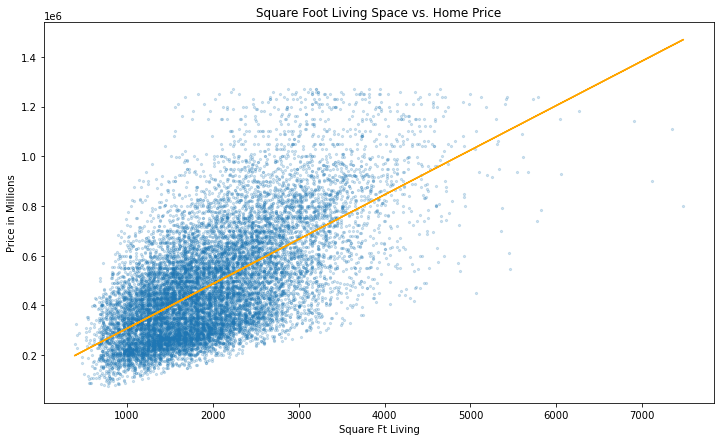

In [89]:
fig, ax = plt.subplots(figsize = (12,7))


ax.scatter(X_train['sqft_living'], y_train, s = 5, alpha=0.2)
m, b = np.polyfit(X_train['sqft_living'], y_train, 1)
plt.plot(X_train['sqft_living'], m*X_train['sqft_living']+b, color = 'orange')
ax.set_xlabel("Square Ft Living")
ax.set_ylabel("Price in Millions")
ax.set_title("Square Foot Living Space vs. Home Price")

plt.savefig("Square Foot Living and Home Price");


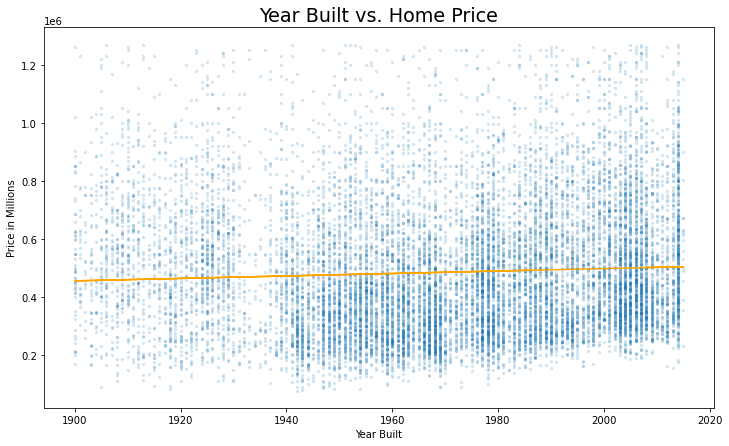

In [90]:
fig, ax = plt.subplots(figsize = (12,7))

plt.rcParams['font.size'] = 16

ax.scatter(X_train['yr_built'], y_train, s = 5, alpha=0.15)
m, b = np.polyfit(X_train['yr_built'], y_train, 1)
plt.plot(X_train['yr_built'], m*X_train['yr_built']+b, color = 'orange')
ax.set_xlabel("Year Built")
ax.set_ylabel("Price in Millions")
ax.set_title("Year Built vs. Home Price");



In [91]:
#Investigate change in price median over time

house_2015 = new_house.loc[new_house['yr_built'] == 2015]
print(house_2015['price'].median())
house_2010 = new_house.loc[new_house['yr_built'] == 2010]
print(house_2010['price'].median())
house_2005 = new_house.loc[new_house['yr_built'] == 2005]
print(house_2005['price'].median())
house_2000 = new_house.loc[new_house['yr_built'] == 2000]
print(house_2000['price'].median())
house_1995 = new_house.loc[new_house['yr_built'] == 1995]
print(house_1995['price'].median())
house_1990 = new_house.loc[new_house['yr_built'] == 1990]
print(house_1990['price'].median())
house_1985 = new_house.loc[new_house['yr_built'] == 1985]
print(house_1985['price'].median())
house_1980 = new_house.loc[new_house['yr_built'] == 1980]
print(house_1980['price'].median())
house_1960 = new_house.loc[new_house['yr_built'] == 1960]
print(house_1960['price'].median())

605805.5
442475.0
476100.0
518000.0
495000.0
440975.0
428500.0
399975.0
370250.0


In [92]:
# scale the data


from sklearn.preprocessing import StandardScaler

# Importances are based on coefficient magnitude, so
# we need to scale the data to normalize the coefficients

ss = StandardScaler()

ss.fit(X_train)

X_train_scaled = ss.transform(X_train)

X_train_scaled

array([[ 0.7389292 ,  0.61778046,  0.52050917, ..., -0.3107676 ,
        -0.26535237, -0.27031125],
       [ 0.08281385, -0.26954007, -2.25479799, ..., -0.3107676 ,
         3.76857379, -0.27031125],
       [ 1.30672133, -0.17765348,  1.47987461, ..., -0.3107676 ,
        -0.26535237, -0.27031125],
       ...,
       [-0.45974308, -0.13930711, -0.54164542, ..., -0.3107676 ,
        -0.26535237, -0.27031125],
       [-0.35880225, -0.17065949, -0.30180406, ..., -0.3107676 ,
         3.76857379, -0.27031125],
       [-1.17894644, -0.32643257,  1.2742963 , ..., -0.3107676 ,
        -0.26535237, -0.27031125]])

In [93]:
#Examine scaled model summary
sm.OLS(y_train, sm.add_constant(X_train_scaled)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     586.9
Date:                Wed, 21 Sep 2022   Prob (F-statistic):               0.00
Time:                        14:46:35   Log-Likelihood:            -1.9984e+05
No. Observations:               15567   AIC:                         4.000e+05
Df Residuals:                   15434   BIC:                         4.010e+05
Df Model:                         132                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.858e+05    732.559    663.184      0.000    4.84e+05    4.87e+05
x1          8.217e+04   1499.841     54.789      0.000    7.92e+04    8.51e+04
x2          1.169e+04    811.620     14.406      0.000    1.01e+04    1.33e+04
x3         -1.783e+04   1327.093    -13.432      0.000   -2.04e+04   -1.52e+04
x4            1.5e+04   4512.926      3.324      0.001    6155.304    2.38e+04
x5         -8787.7660   2713.237     -3.239      0.001   -1.41e+04   -3469.503
x6         -5274.1531    466.584    -11.304      0.000   -6188.712   -4359.594
x7         -3560.4685    730.813     -4.872      0.000   -4992.947   -2127.989
x8          1222.7490    491.519      2.488      0.013     259.314    2186.184
x9         -4563.9184    739.725     -6.170      0.000   -6013.866   -3113.971
x10         9276.7588    665.246     13.945      0.000    7972.798    1.06e+04
x11         3.096e+04    837.427     36.970      0.000    2.93e+04    3.26e+04
x12         2.256e+04    804.119     28.055      0.000     2.1e+04    2.41e+04
x13         5021.6832    813.267      6.175      0.000    3427.585    6615.782
x14          357.4149    744.895      0.480      0.631   -1102.668    1817.498
x15        -2028.8476    769.400     -2.637      0.008   -3536.963    -520.732
x16        -8040.9394    787.306    -10.213      0.000   -9584.151   -6497.727
x17         -2.32e+04    850.116    -27.292      0.000   -2.49e+04   -2.15e+04
x18         -2.25e+04    599.881    -37.505      0.000   -2.37e+04   -2.13e+04
x19         2382.1325    590.481      4.034      0.000    1224.721    3539.544
x20         2.998e+04    773.563     38.756      0.000    2.85e+04    3.15e+04
x21         3428.2305    586.839      5.842      0.000    2277.957    4578.504
x22         1.623e+04    713.268     22.750      0.000    1.48e+04    1.76e+04
x23         1854.4803    692.696      2.677      0.007     496.715    3212.245
x24         8587.4118    675.198     12.718      0.000    7263.944    9910.880
x25        -1.254e+04    408.228    -30.714      0.000   -1.33e+04   -1.17e+04
x26        -1514.8235    723.620     -2.093      0.036   -2933.204     -96.443
x27        -1312.7921    371.494     -3.534      0.000   -2040.964    -584.620
x28         1312.7921    371.494      3.534      0.000     584.620    2040.964
x29        -1287.1793    776.615     -1.657      0.097   -2809.435     235.077
x30         -277.6095    747.967     -0.371      0.711   -1743.712    1188.493
x31         2494.8579    502.040      4.969      0.000    1510.800    3478.915
x32          932.1154    582.190      1.601      0.109    -209.046    2073.277
x33        -3791.9035    733.354     -5.171      0.000   -5229.363   -2354.444
x34        -3172.8780    760.398     -4.173      0.000   -4663.347   -1682.409
x35        -2832.3122    785.099     -3.608      0.000   -4371.198   -1293.427
x3

### Check for linearity and normality assumptions

In [94]:
y_train.mean()

485821.4763923685

In [124]:
# Fit the model

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)


LinearRegression()

In [125]:
print(lr.intercept_)


485826.5829306427


In [126]:
lr.score(X_train_scaled, y_train)

0.8338617877426238

In [127]:
y_hat = lr.predict(X_train_scaled)
y_hat

array([636012.08293064, 633455.58293064, 501117.33293064, ...,
       807907.70793064, 483302.52043064, 360866.20793064])

In [128]:
X_train_scaled.shape

(15567, 140)

In [129]:
base_pred = np.zeros(140).reshape(1, -1)
base_pred

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [130]:
lr.predict(base_pred)

array([485826.58293064])

#### Homoscedasticity

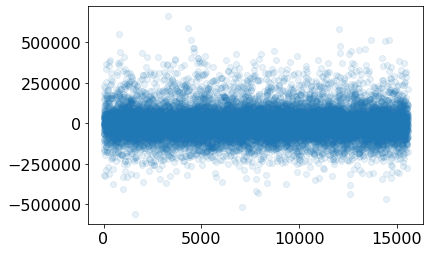

In [131]:
#Observe Residuals

y_hat = lr.predict(X_train_scaled)
resid = (y_train - y_hat)

plt.scatter(x=range(y_hat.shape[0]),y=resid, alpha=0.1)

#### Linearity

In [136]:
model_2 = LinearRegression()
model_2.fit(X_train_scaled, y_train)


LinearRegression()

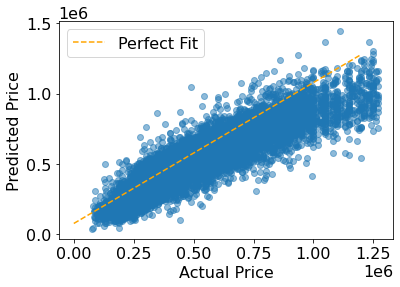

In [137]:
#Check for linearity


preds = model_2.predict(X_train_scaled)
fig, ax = plt.subplots()

perfect_line = np.arange(y_train.min(), y_train.max())
ax.plot(perfect_line, linestyle="--", color="orange", label="Perfect Fit")
ax.scatter(y_train, preds, alpha=0.5)
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
ax.legend();

#### Normality

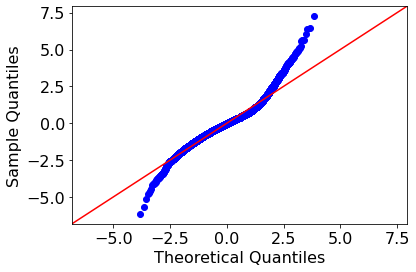

In [138]:
#Investigate normality - qq-plot
import scipy.stats as stats
preds = model_2.predict(X_train_scaled)

residuals = (y_train - preds)
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True);

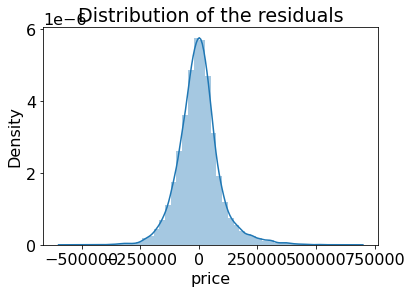

In [148]:
# check for normality among the residuals
p = sns.distplot(residuals,kde=True)
p = plt.title('Distribution of the residuals')

### Investigate predictive model metrics

In [139]:
# R squared score
import sklearn.metrics as metrics
metrics.r2_score(y_train, lr.predict(X_train_scaled))

0.8338617877426238

In [140]:
# Mean Absolute Error Score
metrics.mean_absolute_error(y_train, lr.predict(X_train_scaled))

65274.39441486046

In [141]:
# Mean Error Squared Score
metrics.mean_squared_error(y_train, lr.predict(X_train_scaled), squared = False)

91008.54761068278

In [142]:
# Target Median 
y_train.median()

440000.0

In [143]:
# Target Mean
y_train.mean()

485821.4763923685

### Apply model to test data

In [144]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5189 entries, 10693 to 2574
Columns: 140 entries, sqft_living to 12
dtypes: float64(137), int64(3)
memory usage: 5.6 MB


In [145]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15567 entries, 13029 to 16406
Columns: 140 entries, sqft_living to 12
dtypes: float64(137), int64(3)
memory usage: 16.7 MB


In [150]:
# Validate model_2 against the test data
model_2.fit(X_train, y_train)
model_2.score(X_test, y_test)

0.8313230634851568

In [152]:
# Use a selector to find best features

from sklearn.feature_selection import RFECV
from sklearn.preprocessing import StandardScaler

# Importances are based on coefficient magnitude, so
# we need to scale the data to normalize the coefficients
X_train_for_RFECV = StandardScaler().fit_transform(X_train)

model_for_RFECV = LinearRegression()

# Instantiate and fit the selector
selector = RFECV(model_for_RFECV, cv=splitter)
selector.fit(X_train_for_RFECV, y_train)

# Print the results
print("Was the column selected?")
for index, col in enumerate(X_train.columns):
    print(f"{col}: {selector.support_[index]}")

Was the column selected?
sqft_living: False
sqft_lot: False
yr_built: False
lat: False
long: False
Average: False
Fair: False
Good: False
Poor: False
Very Good: False
10 Very Good: False
11 Excellent: False
12 Luxury: False
3 Poor: False
4 Low: False
5 Fair: False
6 Low Average: False
7 Average: False
8 Good: False
9 Better: False
AVERAGE: False
EXCELLENT: False
FAIR: False
GOOD: False
NONE: False
missing: False
0: False
1: False
1: False
2: False
3: False
4: False
5: False
6: False
7: False
8: False
9: False
10: False
11: False
33: False
0.5: False
0.75: False
1.0: False
1.25: False
1.5: False
1.75: False
2.0: False
2.25: False
2.5: False
2.75: False
3.0: False
3.25: False
3.5: False
3.75: False
4.0: False
4.25: False
4.5: False
4.75: False
5.0: False
5.25: False
5.5: False
5.75: False
6.0: False
6.5: False
6.75: False
98001: False
98002: False
98003: False
98004: False
98007: False
98008: False
98010: False
98011: False
98014: False
98019: False
98022: False
98023: False
98024: False

### Summary evaluation of predictive model 2

The predictive model improved quite dramatically over model 1 by almost 12%, primarily as a result of one hot encoding the zipcode. There are 13 zipcodes where the p_value was above .05. These predictors were rejected. Our predictive model_2 now has a train score of  0.833 and a validation score of 0.833. 

Our residuals look good suggesting we have a random distribution.  Linearity looks good overall. The normal distribution appears to have some skew and outliers meaning our model needs improvement, more work needs to be done on making the data more of a normal distribution. 

Our mean absolute error squared is 65,274 meaning our model can still be off by a fair amount in price.  If our median home value is $440,000 then ARCH will have to be careful in how prices are negotiated with sellers, but ARCH should also look to other factors beyond this model in pricing such as market pressures, mortgage lending rates, etc.

The final training model was applied to the test data with a score of .83. This suggests that 83% of the variance in home price can be explained by our current model. 

### Results for Final Predictive Model

In [153]:
print("Baseline Model uses Square Foot Living Space as the most correlated feature")
print()
print("Baseline Train score:     ", baseline_scores["train_score"].mean())
print("Baselin Validation score:", baseline_scores["test_score"].mean())
print()
print("Model_1 converts categorical data to numeric and one hot encodes grade, condition, view and renovated.")
print()
print("Model_1 Train score:     ", model_1_scores["train_score"].mean())
print("Model_1 Validation score:", model_1_scores["test_score"].mean())
print()
print("Model_2 further one hot encodes for bedrooms, bathrooms, floors, zipcode, and sale_month.\n"
      "Model_2 also standardizes the data and eliminates variables with p-value > 0.05. \n"
      "By one hot encoding zipcode the score increased by 10%.")
print()
print("Model_2 Train score:     ", model_2_scores["train_score"].mean())
print("Model_2 Validation score:", model_2_scores["test_score"].mean())

Baseline Model uses Square Foot Living Space as the most correlated feature

Baseline Train score:      0.40324782709139456
Baselin Validation score: 0.409301098969402

Model_1 converts categorical data to numeric and one hot encodes grade, condition, view and renovated.

Model_1 Train score:      0.7028422850446635
Model_1 Validation score: 0.7035709013153183

Model_2 further one hot encodes for bedrooms, bathrooms, floors, zipcode, and sale_month.
Model_2 also standardizes the data and eliminates variables with p-value > 0.05. 
By one hot encoding zipcode the score increased by 10%.

Model_2 Train score:      0.8382318896676972
Model_2 Validation score: 0.837137229023198


#### Score Final Model

In [154]:
metrics.r2_score(y_train, lr.predict(X_train_scaled))

0.8338617877426238

#### Cross validate the model

In [155]:
cross_val_score(model_2, X_train, y_train, cv=3)

array([0.8218404 , 0.83271487, 0.83073384])

#### Mean Error Squared

In [156]:
metrics.mean_squared_error(y_train, lr.predict(X_train_scaled), squared = False)

91008.54761068278

#### Mean Absolute Error Squared

In [157]:
metrics.mean_absolute_error(y_train, lr.predict(X_train_scaled))

65274.39441486046

#### Root Mean Squared Error 

In [158]:
from math import sqrt

rms = sqrt(metrics.mean_squared_error(y_train, lr.predict(X_train_scaled), squared = False))
    
rms

301.6762297740456

#### Apply model to test data

In [159]:
model_2.fit(X_train, y_train)
model_2.score(X_test, y_test)

0.8313230634851568

## Key Metrics and Conclusions

The median price of a home is 440,000 USD. There are some significant home price outliers that skew the mean into the higher range of 485,000 USD

The baseline predictive model shows that the square footage of the home, the most correlated home feature, explains just over 40% of the variance in home price. This means that the larger the home, the higher the price. But that is only part of the explanation.

The final predictive model, which includes several features such as grade of home, the year the home was built, and zipcode, show that these features when added to the baseline model account for over 83% of the variance of a home's price. Zipcode in particular accounts for over 10% of the variation. 

Two important coefficents that emerge that help explain the model are the square living space footage and the year the home was built:

    Square footage = 103
    Year Built = -610

This means that for every one square foot increase we can expect an increase in 103 USD on the home price.
For the Year Built we have a negative number meaning that as the year increases, say from 1990 to 1991, the home price goes down by 610 USD. This suggests that newer homes cost less overall. 

One important metric is the mean absolute error of 65,274. This error implies that the final model could be off by upwards of $65,000 when predicting home price. This could be a substantial amount given that the median home price is 440,000 USD. That error amount could be the difference in whether a moderate or low income family or individual can afford to purchase a home or not. This suggests that more work needs to be done to understand home price. Because zipcode accounts for more than 10% of the variance conducting an analysis on geographic distribution of home prices could be fruitful in pinpointing areas to look for moderately priced homes, or to identify areas to push for affordable housing developments.

Interestingly there is not a great difference in price effect when it comes to condition, whether the home is in fair, average, good, or very good condition. If the house is in poor condition, however, home sale price is depressed more markedly. The build grade of the home from poor towards luxury does have a positive correlation. As grade improves home price increases as well, particularly as we move from 'good' to 'better' grade values. 


### Recommendations

1. Search for homes sizes under 1700 square feet or less. This will likely keep the home price under the median. 

This was calculated by taking the sqft_living variance of 40% multiplied by the home price median of 440,000 and divided by 103 USD/per square foot (the coefficient generated by the predictive model. 

            (.40 x 440,000 USD)/103 = 1708.73 square feet
            

2. Newer homes tend to cost less, they bring the home price down year over year by about 610 USD. Look for newer homes being built across zipcodes and further explore why they may cost less. They may have less square footage and be in higher density areas across zipcodes or further away from amenities and work locations making them less desirable and therefore less costly. 


3. Zipcodes play an important role in housing price - up to 10% variance. It would be helpful to do more zipcode analysis and break those areas down further into smaller parcels such as census tracts for more fine grained detail. It's possible that within the same zipcode there may be higher priced areas but with moderate or lower priced homes in the mix. Look for zipcodes that have a wider range of home price values. 